[[Model]]
    ((((((Model(gaussian, prefix='Au4f72_') + Model(gaussian, prefix='Au4f52_')) + Model(linear, prefix='l_')) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_')) + Model(gaussian, prefix='p4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1765
    # data points      = 335
    # variables        = 22
    chi-square         = 2171.24030
    reduced chi-square = 6.93686998
    Akaike info crit   = 670.089312
    Bayesian info crit = 754.000184
[[Variables]]
    l_intercept:       14288.5223 (init = 2050)
    l_slope:           286.038491 (init = 6)
    l2_intercept:      0.00000000 (init = 0)
    l2_slope:          1.00000000 (init = 1)
    Au4f72_sigma:      0.84315952 (init = 1)
    Au4f72_center:     80.0303414 (init = 79.8)
    Au4f72_amplitude:  169607.726 (init = 100000)
    Au4f72_fwhm:       1.98548890 == '2.3548200*Au4f72_sigma'
    Au4f72_height:     80250.1720 == '0.3989423*Au4f72_amplitu

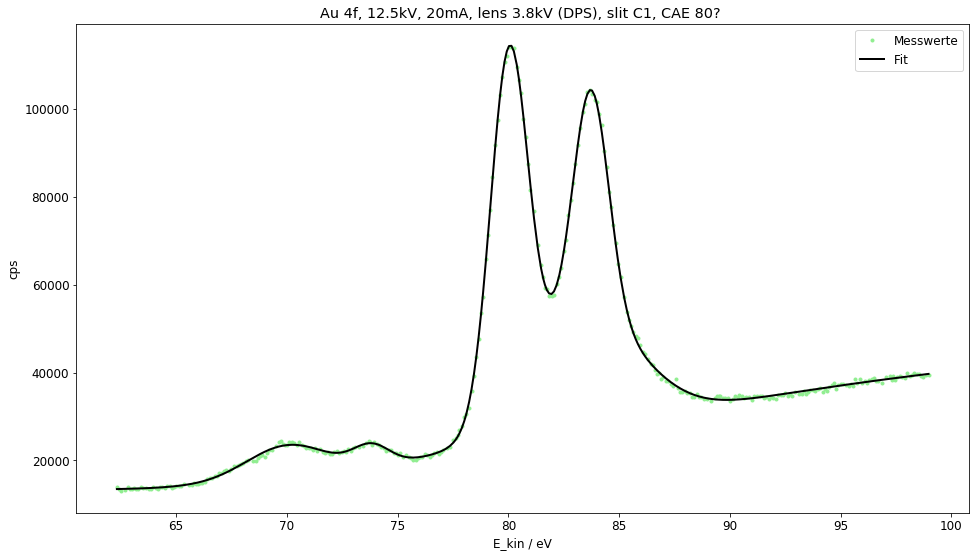

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel, LinearModel, GaussianModel, LorentzianModel

data = np.loadtxt('data.txt')
energy = data[:,0]+18
cps = data[:,1]

plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 12})

from math import factorial


lin = LinearModel(prefix='l_')
pars = lin.guess(cps, x=energy)
pars['l_intercept'].set(-584839.726)
pars['l_slope'].set(2083)

lin2 = LinearModel(prefix='l2_')
pars.update( lin2.make_params())
pars['l_intercept'].set(2050)
pars['l_slope'].set(6)

Au4f_72 = GaussianModel(prefix='Au4f72_')
pars.update( Au4f_72.make_params())
pars['Au4f72_center'].set(79.8)
pars['Au4f72_sigma'].set(1)
pars['Au4f72_amplitude'].set(100000)

Au4f_52 = GaussianModel(prefix='Au4f52_')
pars.update( Au4f_52.make_params())
pars['Au4f52_center'].set(83.5)
pars['Au4f52_sigma'].set(0.9)
pars['Au4f52_amplitude'].set(77000)

p1 = GaussianModel(prefix='p1_')
pars.update( p1.make_params())
pars['p1_center'].set(74)
pars['p1_sigma'].set(1)
pars['p1_amplitude'].set(5000)

p2 = GaussianModel(prefix='p2_')
pars.update( p2.make_params())
pars['p2_center'].set(70)
pars['p2_sigma'].set(2)
pars['p2_amplitude'].set(30000)

p3 = GaussianModel(prefix='p3_')
pars.update( p3.make_params())
pars['p3_center'].set(84)
pars['p3_sigma'].set(2)
pars['p3_amplitude'].set(18000)

p4 = GaussianModel(prefix='p4_')
pars.update( p4.make_params())
pars['p4_center'].set(77)
pars['p4_sigma'].set(2)
pars['p4_amplitude'].set(28000)

mod = Au4f_72 + Au4f_52 + lin  + p1 + p2 + p3 +p4
init = mod.eval(pars, x=energy)
#plt.plot(energy, init, 'k--')
yerr=np.sqrt(cps)
#plt.errorbar(energy, cps, yerr,fmt=' ', color='lightgreen', label='Messwerte', zorder = 2)
plt.plot(energy, cps, 'o',color='lightgreen' , ms=3, zorder = 1, label='Messwerte')
#plt.plot(energy2, cps2, 'o',color='lightgreen' , ms=3, zorder = 1, label='Messwerte')

out = mod.fit(cps , pars, x=energy,weights = 1/yerr)
print(out.fit_report(min_correl=0.25))
#out.plot()
#plt.plot(energy, out.init_fit, 'k--')
plt.plot(energy, out.best_fit,  '-',lw = 2,color='black', zorder = 3, label = "Fit")
plt.legend(loc = 'best')
plt.title('Au 4f, 12.5kV, 20mA, lens 3.8kV (DPS), slit C1, CAE 80? ')
plt.xlabel('E_kin / eV')
plt.ylabel('cps')
#svg = savitzky_golay(cps, 51, 5)
#plt.plot(energy,svg, color = 'green', lw = 1)
plt.savefig('Au4f.pdf')
plt.show()